## 1.0 - Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting settings
%matplotlib inline
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)

## 2.0 - Loading Data

In [2]:
df = pd.read_csv('../data/raw/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3.0 - Basic data inspection

In [3]:
# Shape of the dataset
df.shape

(7043, 21)

In [4]:
# Preview the first rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Overview of data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Count of missing values per column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Descriptive statistics for numeric features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 4.0 - EDA

### 4.1 - Dependent variable analysis

In [8]:
# Check the distribution of the target variable 'Churn'
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("Churn counts:")
print(churn_counts)
print("\nChurn percentage:")
print(churn_percent)

Churn counts:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_3684\3526703349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


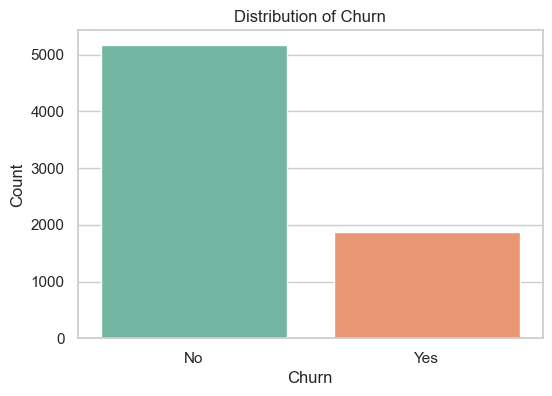

In [9]:
# Plot the distribution of churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

### 4.2 - Categorical Columns

In [10]:
# Filter categorical columns excluding 'Churn' and those with too many unique categories
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

# Remove columns with too many unique values (e.g., more than 20)
categorical_cols = [col for col in categorical_cols if df[col].nunique() <= 20]

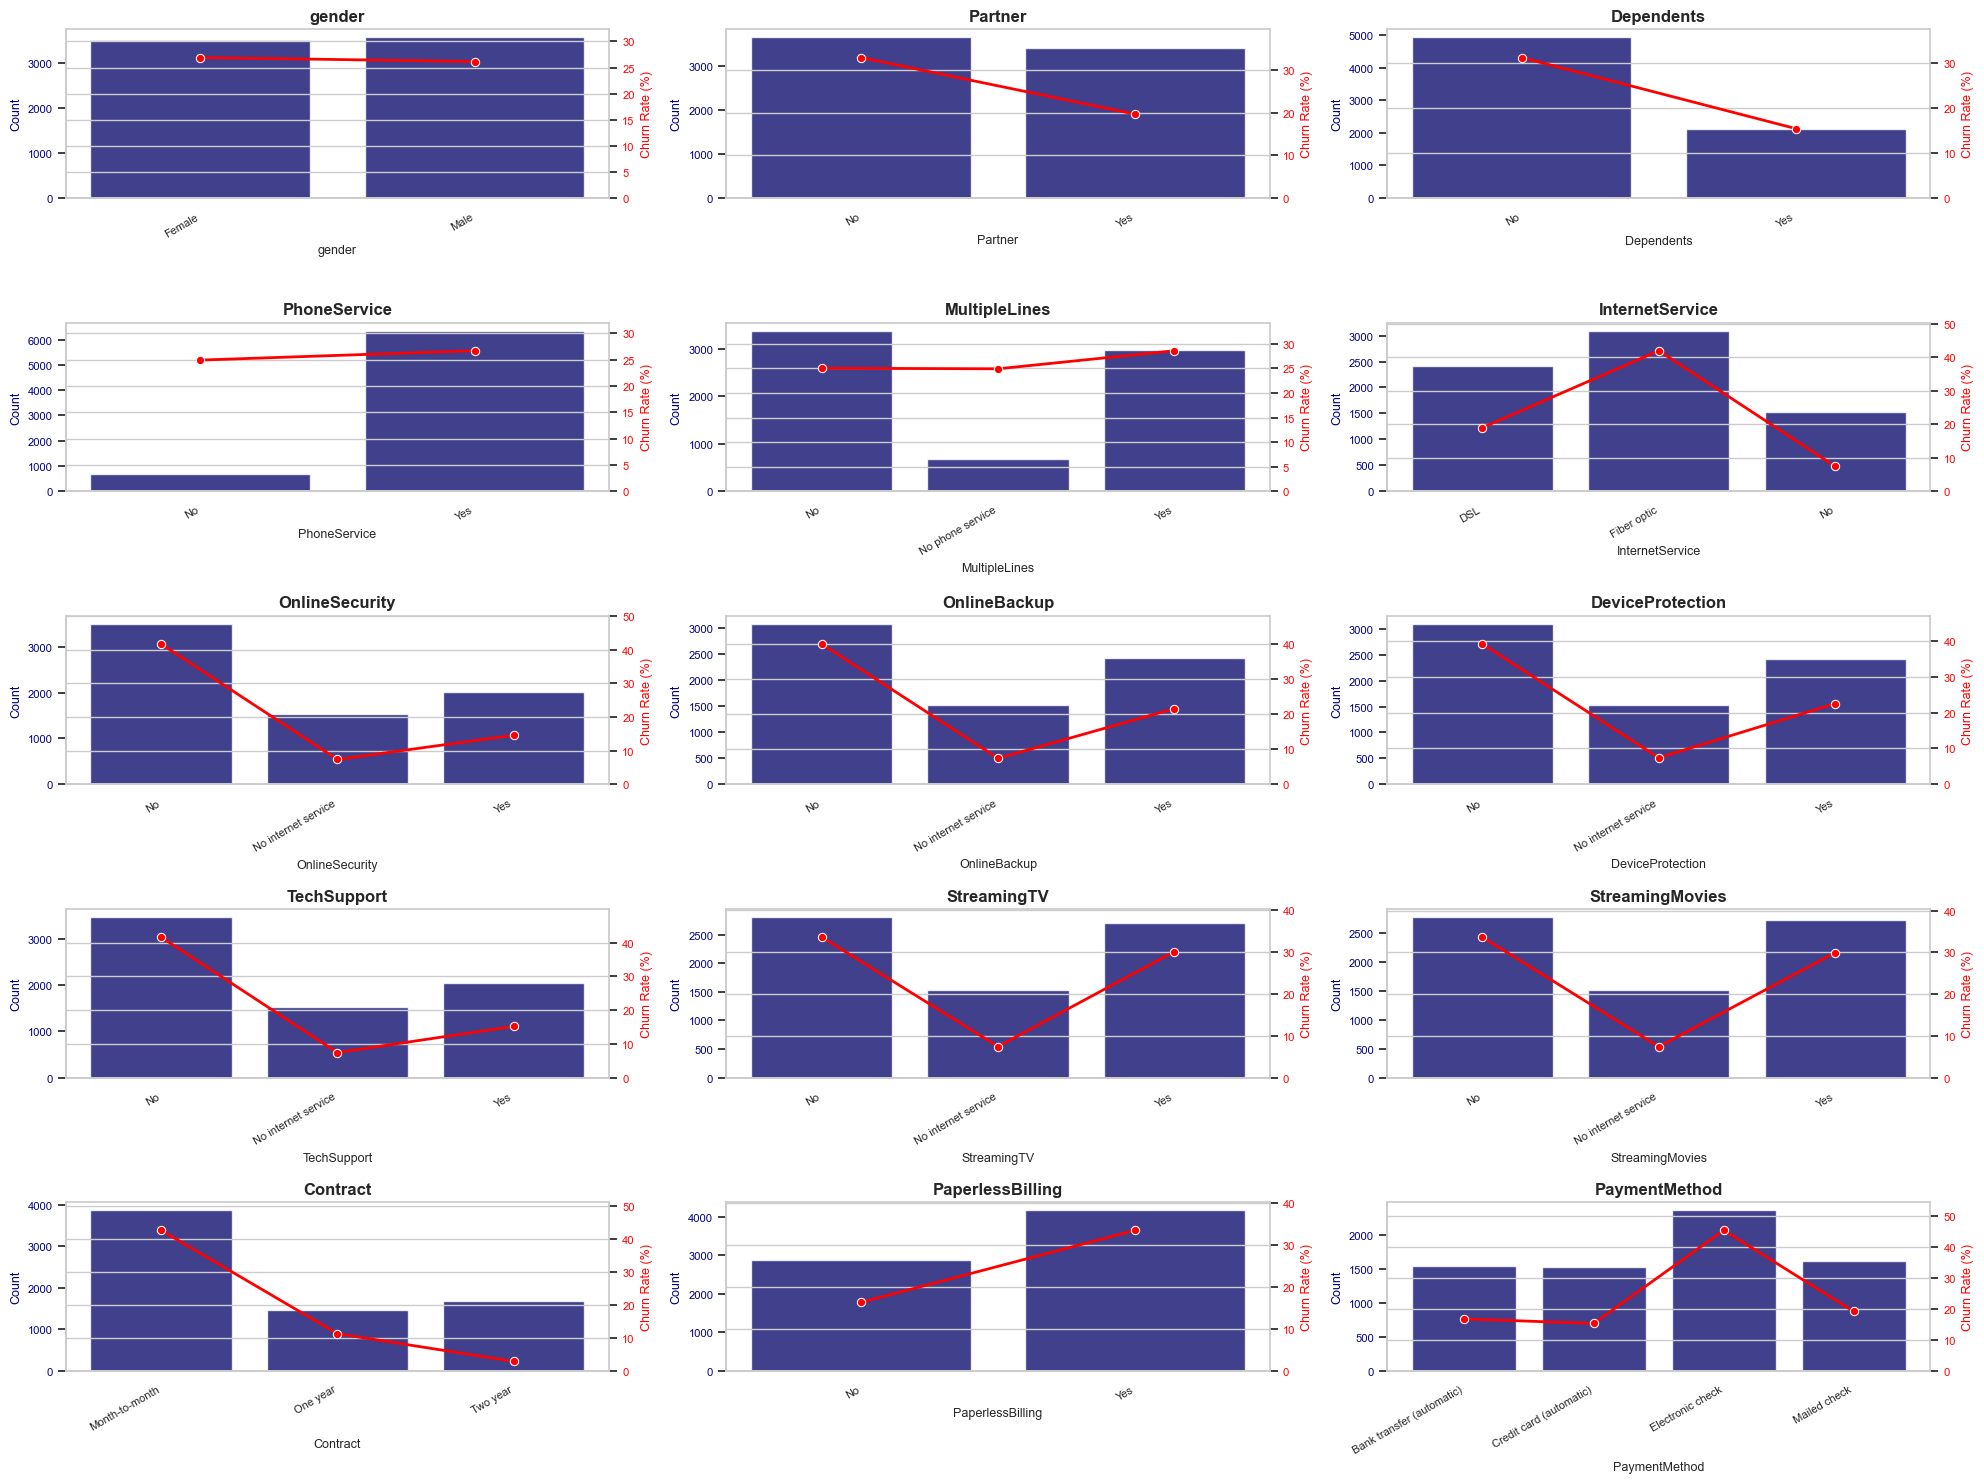

In [11]:
# Setting seaborn style for nicer plots
sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 12, 'axes.labelsize': 9})

# Number of graphs
num_plots = len(categorical_cols)
rows, cols = 5, 3

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()  # Facilita iterar

for i, col in enumerate(categorical_cols):
    counts = df[col].value_counts().sort_index()
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_index() * 100

    ax1 = axes[i]

    # Bar plot - counts (blue)
    sns.barplot(x=counts.index, y=counts.values, alpha=0.8, color='navy', ax=ax1)
    ax1.set_ylabel('Count', color='navy', fontsize=9)
    ax1.tick_params(axis='y', labelcolor='navy', labelsize=8)
    
    # Set ticks correctly to avoid warning
    ax1.set_xticks(range(len(counts)))
    ax1.set_xticklabels(counts.index, rotation=30, ha='right', fontsize=8)

    sns.despine(ax=ax1)
    ax1.grid(False)

    # Second y-axis for churn rate (red line)
    ax2 = ax1.twinx()
    sns.lineplot(x=range(len(churn_rate)), y=churn_rate.values, marker='o', color='red', linewidth=2, ax=ax2)
    ax2.set_ylabel('Churn Rate (%)', color='red', fontsize=9)
    ax2.tick_params(axis='y', labelcolor='red', labelsize=8)
    ax2.set_ylim(0, max(churn_rate.values) * 1.2)

    # Set xticks for ax2 as well to align line plot with bars
    ax2.set_xticks(range(len(churn_rate)))

    ax1.set_title(f'{col}', fontsize=12, weight='bold')

# Remove any unused subplots if num_plots < rows*cols
for j in range(num_plots, rows*cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.3 - Numerical Columns

In [12]:
# Select numerical columns only (excluding ID columns or object types wrongly labeled)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical columns:")
print(numerical_cols)

Numerical columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [13]:
# Convert 'TotalCharges' to numeric, forcing invalid values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many missing values appeared
missing_total = df['TotalCharges'].isna().sum()
print(f"Missing values in 'TotalCharges' after conversion: {missing_total}")

Missing values in 'TotalCharges' after conversion: 11


In [14]:
# Remove rows where 'TotalCharges' is NaN
df = df[df['TotalCharges'].notna()].copy()

# Confirm shape after removal
print(f"New shape after removing missing 'TotalCharges': {df.shape}")

New shape after removing missing 'TotalCharges': (7032, 21)


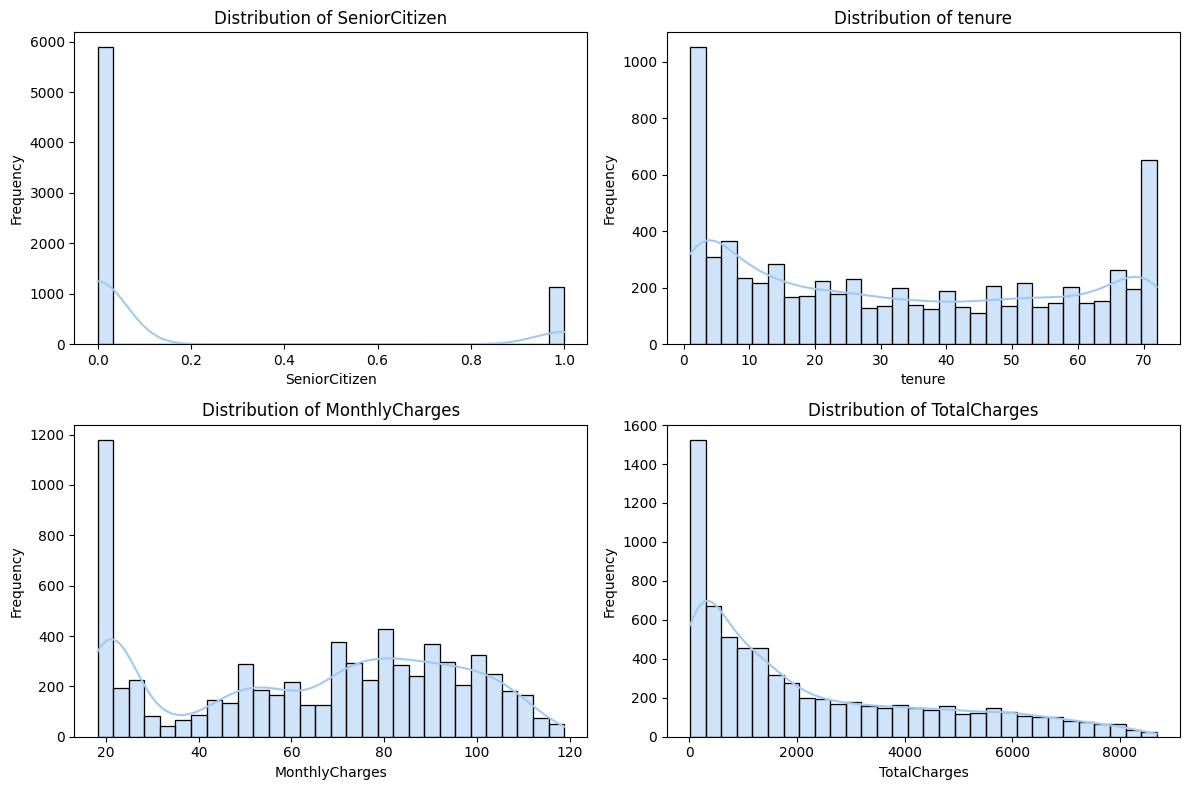

In [15]:

# Updated list of numerical columns
numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for each numerical variable
plt.style.use('default')
sns.set_palette('pastel')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

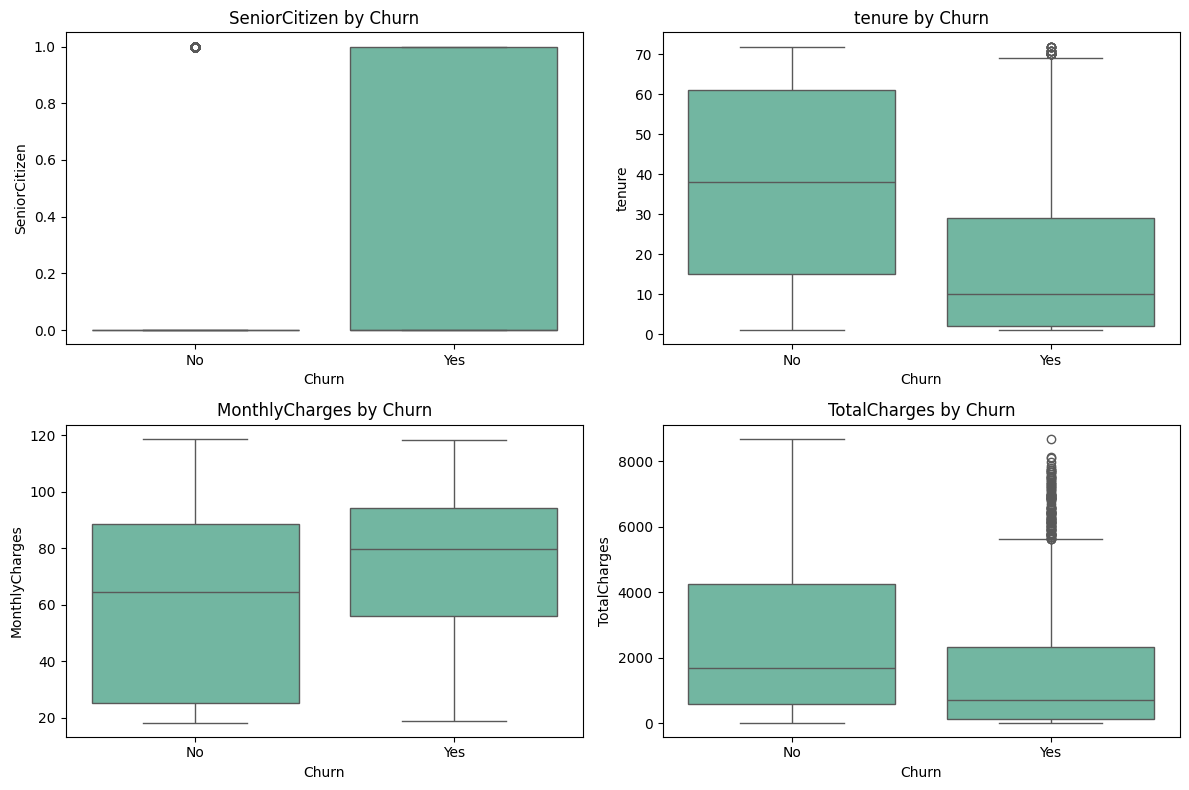

In [16]:
# Plot boxplots comparing churned vs non-churned for numerical features
plt.style.use('default')
sns.set_palette('Set2')

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

Outliers observed in `tenure` and `TotalCharges` (within the churned group) were retained, as they represent meaningful customer behaviors such as long-time or high-paying clients choosing to churn. No artificial removal or winsorization was applied.


### Key Findings from Numerical Features

- **SeniorCitizen**: Although most customers are not seniors, the churn rate is slightly higher among senior customers, suggesting age may play a minor role in retention.

- **Tenure**: Customers who churned tend to leave within the first 12 months, while retained customers usually have a longer tenure. This implies early-stage customer engagement might be crucial to reduce churn.

- **MonthlyCharges**: Higher monthly charges are associated with churn. Churned customers show a noticeably higher median charge than those who stayed, indicating that expensive plans might drive dissatisfaction.

- **TotalCharges**: Customers who churn tend to have lower total charges, reflecting their shorter time with the company. This aligns with the pattern observed in the tenure variable.

### 4.4 - Correlation Analysis

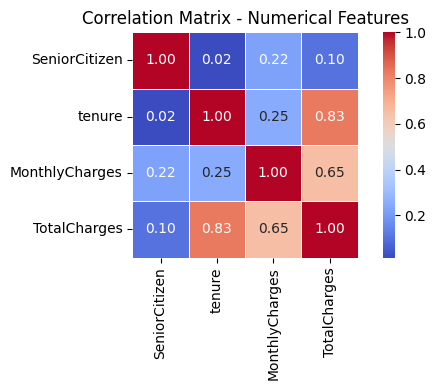

In [17]:
# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Correlation Matrix - Numerical Features')
plt.tight_layout()
plt.show()

## 5.0 - Feature Engineering

### 5.1 - tenure_group

In [18]:
# Create tenure groups
def tenure_group(tenure):
    if tenure <= 12:
        return '0–12'
    elif tenure <= 24:
        return '13–24'
    elif tenure <= 48:
        return '25–48'
    elif tenure <= 60:
        return '49–60'
    else:
        return '61+'

# Apply the function to create a new column
df['tenure_group'] = df['tenure'].apply(tenure_group)

# Confirm distribution
print(df['tenure_group'].value_counts().sort_index())

tenure_group
0–12     2175
13–24    1024
25–48    1594
49–60     832
61+      1407
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_3684\1051622114.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(counts.index, rotation=0, fontsize=9)


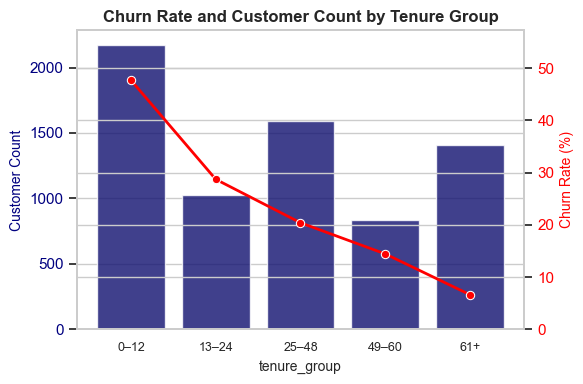

In [19]:
# Set style
sns.set(style="whitegrid")
plt.rcParams.update({'figure.figsize': (6, 4), 'axes.titlesize': 12, 'axes.labelsize': 10})

# Get counts and churn rate
counts = df['tenure_group'].value_counts().sort_index()
churn_rate = df.groupby('tenure_group')['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_index() * 100

# Plot
fig, ax1 = plt.subplots()

# Barplot - counts
sns.barplot(x=counts.index, y=counts.values, color='navy', alpha=0.8, ax=ax1)
ax1.set_ylabel('Customer Count', color='navy')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.set_xticklabels(counts.index, rotation=0, fontsize=9)

# Lineplot - churn rate
ax2 = ax1.twinx()
sns.lineplot(x=churn_rate.index, y=churn_rate.values, color='red', marker='o', linewidth=2, ax=ax2)
ax2.set_ylabel('Churn Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, churn_rate.max() * 1.2)

plt.title('Churn Rate and Customer Count by Tenure Group', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

The churn rate drops significantly as tenure increases. This suggests that long-term customers are more likely to stay, while new customers are at higher risk of churning. The engineered feature `tenure_group` captures this behavior clearly and will be used in modeling.


### 5.2 - charges_per_month

In [20]:
# Create a new feature: average charges per month
df['charges_per_month'] = df['TotalCharges'] / df['tenure']

# Quick check
print(df['charges_per_month'].describe())

count    7032.000000
mean       64.799424
std        30.185891
min        13.775000
25%        36.179891
50%        70.373239
75%        90.179560
max       121.400000
Name: charges_per_month, dtype: float64


C:\Users\Dell\AppData\Local\Temp\ipykernel_3684\941024705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='charges_per_month', palette='Set2')


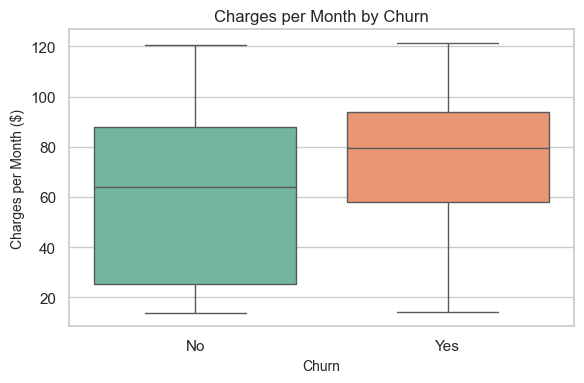

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='charges_per_month', palette='Set2')
plt.title('Charges per Month by Churn')
plt.xlabel('Churn')
plt.ylabel('Charges per Month ($)')
plt.tight_layout()
plt.show()

The engineered feature `charges_per_month` shows a higher median for churned customers, indicating that those paying more monthly are slightly more likely to leave. Although there is some overlap between churned and non-churned groups in the range of 60–85, this variable remains valuable for modeling when combined with other predictors.

In [23]:
# Save the cleaned and feature-engineered dataset
df.to_csv('../data/processed/telco_eda_cleaned.csv', index=False)

## 6.0 - EDA Summary and Key Insights

The exploratory data analysis revealed several important patterns related to customer churn in the telecom dataset:

- **Churn Distribution**: The dataset is imbalanced, with approximately 26.6% of customers labeled as churned. This will require careful consideration during modeling.

- **Categorical Features**:
  - Customers with **month-to-month contracts**, **electronic billing**, and **no online security or tech support** showed significantly higher churn rates.
  - Senior citizens are a minority in the dataset but display a slightly higher churn tendency.

- **Numerical Features**:
  - **Tenure** is a strong indicator of churn: customers who churned tend to leave within their first 12 months.
  - **MonthlyCharges** and **charges_per_month** are higher for churned customers, suggesting that expensive plans may increase cancellation risk.
  - **TotalCharges** is naturally lower for churned customers due to shorter time with the company.

- **Feature Engineering**:
  - A new variable `tenure_group` was created to segment customers by time with the company, revealing a clear downward trend in churn as tenure increases.
  - Another derived feature, `charges_per_month` (`TotalCharges / tenure`), was introduced to capture average monthly spending, providing additional insight into churn behavior.

No missing values remained after converting `TotalCharges`, and no outliers were removed, as all extreme values reflected realistic and relevant customer behavior.